## Библиотеки и данные

### Загрузка библиотек и датасета

Загрузка необходимых для работы библиотек

In [411]:
# operations with data
import pandas as pd
from sklearn.model_selection import train_test_split
# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# ensembles
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
# metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
# preprocessing
import numpy as np
# scaling
from sklearn.preprocessing import MinMaxScaler

Загрузка датасета

In [412]:
dataset = pd.read_csv('data/smoking.csv')
dataset.shape

(55692, 27)

### Препроцессинг

In [413]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [414]:
dataset.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


Три признака являются номинальными: <i>gender, oral, tartar</i>.

Шесть признаков имеют тип int64: <i>ID, age, height(cm), weight(kg), dental caries, smoking</i>.

In [415]:
#### Binary Label Encoder
dataset['gender'] = np.where(dataset['gender'] == 'F', np.int64(1), np.int64(0))
dataset['oral'] = np.where(dataset['oral'] == 'Y', np.int64(1), np.int64(0))
dataset['tartar'] = np.where(dataset['tartar'] == 'Y', np.int64(1), np.int64(0))

Уберем столбец ID

In [416]:
del dataset['ID']

Выделим все столбцы датасета кроме таргетного, чтобы использовать в дальнейшем

In [417]:
data_columns = dataset.columns
data_columns = data_columns.drop('smoking')

## Работа с датасетом

### Анализ данных

#### Работа с выбросами

Посмотрим на выбросы

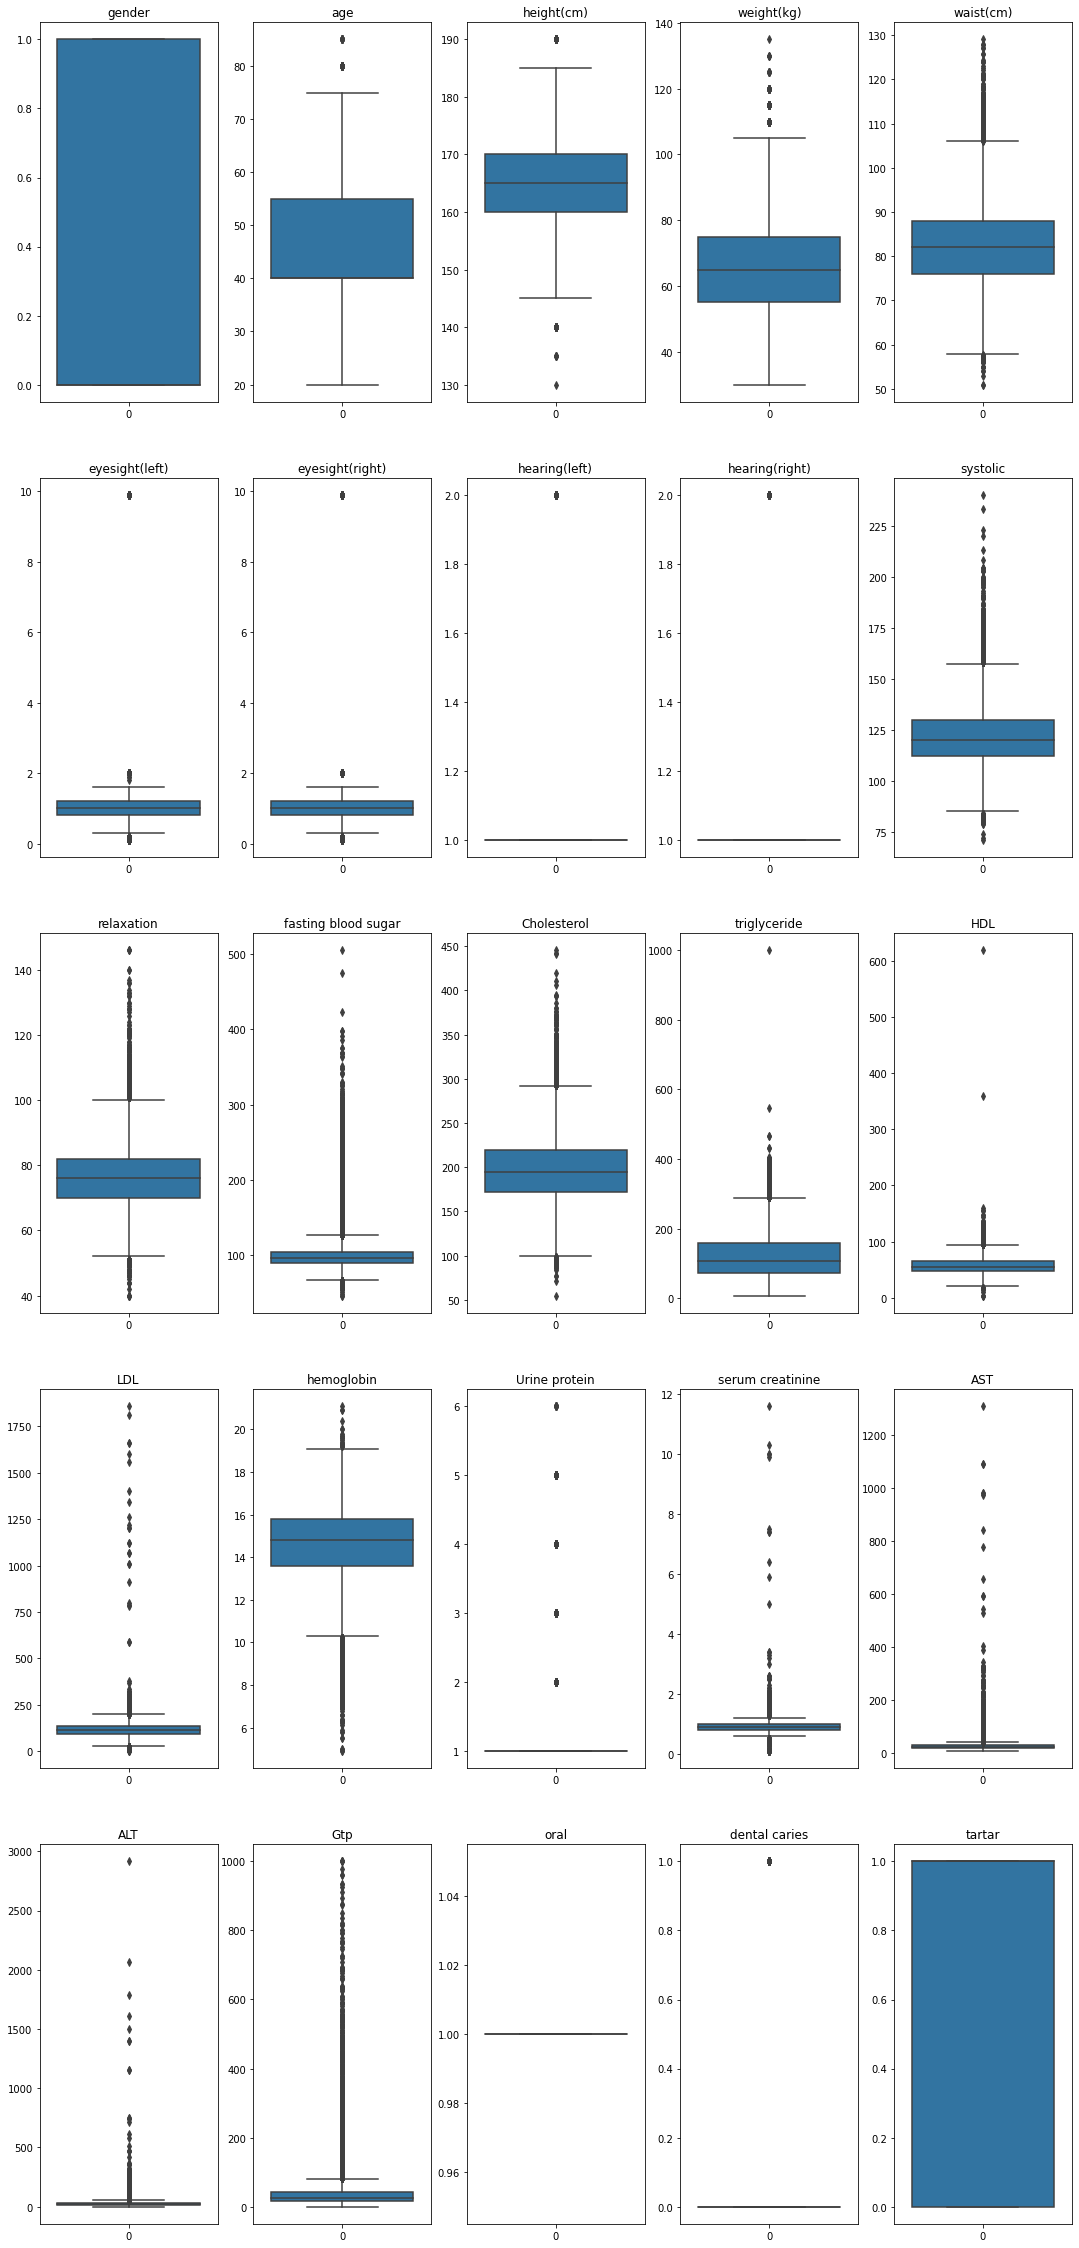

In [418]:
fig, axes = plt.subplots(5, 5)
fig.set_size_inches(18.5, 40.5)
i = 0
j = 0
for column in list(data_columns):
        sns.boxplot(data=dataset[column], ax=axes[i, j]) 
        axes[i, j].set_title(column)
        j+=1
        if j == 5: j = 0; i+=1

Сохранение графика выбросов в PNG формате

In [419]:
fig.savefig('img/outliers.png')

Выводы по графикам 
<ul>
<li>gender - нет выбросов</li>
<li>age - два выброса сверху</li>
<li>height(cm) - сверху 1 и снизу 3</li>
<li>weight(kg) - нет аномалий</li>
<li>waist(cm) - нет аномалий</li>
<li>eyesight(left) - 1 сверху</li>
<li>eyesight(right) - 1 сверху</li>
<li>hearing(left) - а выброс ли это? единственное значение</li>
<li>hearing(right) - а выброс ли это? единственное значение</li>
<li>systolic - 2-4 верхних значения</li>
<li>relaxation - самое верхнее значение</li>
<li>fasting blood sugar - 2-3 верхних значения, 2 нижних</li>
<li>cholesterol - 2 верхних значения, 1 нижнее</li>
<li>triglyceride - 1-2 верхних значения</li>
<li>HDL - два верхних значения</li>
<li>LDL - не похоже на аномалии</li>
<li>hemoglobin - 2 сверху и 2 снизу?</li>
<li>Urine protein - не похоже на аномалии</li>
<li>Serum creatine - убрать все отдельно стоящее?</li>
<li>AST - верхнее значение</li>
<li>ALT - верхнее значение</li>
<li>Gtp - нет аномалий</li>
<li>Oral - нет аномалий</li>
<li>dental caries - нет аномалий</li>
<li>tartar - нет аномалий</li>
</ul>

Рассмотрим отдельно количество аномалий по каждому признаку

In [420]:
print("Количество выбросов в столбце age = ", dataset[dataset['age'] > 79].count()[0])
print("Количество выбросов в столбце height > 189 = ", dataset[dataset['height(cm)'] > 189].count()[0])
print("Количество выбросов в столбце height < 151 = ", dataset[dataset['height(cm)'] < 151].count()[0])
print("Количество выбросов в столбце eyesight(left) = ", dataset[dataset['eyesight(left)'] > 9].count()[0])
print("Количество выбросов в столбце eyesight(right) > 1.9 = ", dataset[dataset['eyesight(right)'] > 1.9].count()[0])
print("Количество выбросов в столбце eyesight(right) > 9 = ", dataset[dataset['eyesight(right)'] > 9].count()[0])
print("Количество выбросов в столбце hearing(left) = ", dataset[dataset['hearing(left)'] > 1.9].count()[0])
print("Количество выбросов в столбце hearing(right) = ", dataset[dataset['hearing(right)'] > 1.9].count()[0])
print("Количество выбросов в столбце systolic = ", dataset[dataset['systolic'] > 225].count()[0])
print("Количество выбросов в столбце relaxation = ", dataset[dataset['relaxation'] > 140].count()[0])
print("Количество выбросов в столбце fasting blood sugar = ", dataset[dataset['fasting blood sugar'] > 450].count()[0])
print("Количество выбросов в столбце Cholesterol > 425 = ", dataset[dataset['Cholesterol'] > 425].count()[0])
print("Количество выбросов в столбце Cholesterol < 45 = ", dataset[dataset['Cholesterol'] < 45].count()[0])
print("Количество выбросов в столбце triglyceride = ", dataset[dataset['triglyceride'] > 500].count()[0])
print("Количество выбросов в столбце HDL = ", dataset[dataset['HDL'] > 300].count()[0])
print("Количество выбросов в столбце serum creatinine = ", dataset[dataset['serum creatinine'] > 8].count()[0])
print("Количество выбросов в столбце AST = ", dataset[dataset['AST'] > 1200].count()[0])
print("Количество выбросов в столбце ALT = ", dataset[dataset['ALT'] > 2500].count()[0])

Количество выбросов в столбце age =  295
Количество выбросов в столбце height > 189 =  37
Количество выбросов в столбце height < 151 =  5940
Количество выбросов в столбце eyesight(left) =  92
Количество выбросов в столбце eyesight(right) > 1.9 =  469
Количество выбросов в столбце eyesight(right) > 9 =  92
Количество выбросов в столбце hearing(left) =  1425
Количество выбросов в столбце hearing(right) =  1456
Количество выбросов в столбце systolic =  2
Количество выбросов в столбце relaxation =  3
Количество выбросов в столбце fasting blood sugar =  2
Количество выбросов в столбце Cholesterol > 425 =  3
Количество выбросов в столбце Cholesterol < 45 =  0
Количество выбросов в столбце triglyceride =  2
Количество выбросов в столбце HDL =  2
Количество выбросов в столбце serum creatinine =  5
Количество выбросов в столбце AST =  1
Количество выбросов в столбце ALT =  1


Скорее всего не содержат аномалий следующие столбцы:

- height на нижней границе
- оба столбца hearing


В остальных столбцах можно удалить выбросы

In [421]:
shape_before = dataset.shape[0]
print("Количество строк датасета до удаления выбросов:", shape_before)
dataset = dataset[(dataset['age'] < 80) & 
                  (dataset['height(cm)'] < 190) & 
                  (dataset['eyesight(left)'] <= 9) &
                  (dataset['eyesight(right)'] <= 1.9) &
                  (dataset['systolic'] <= 225) &
                  (dataset['relaxation'] <= 140) &
                  (dataset['fasting blood sugar'] <= 450) &
                  (dataset['Cholesterol'] <= 420) &
                  (dataset['Cholesterol'] >= 45) &
                  (dataset['triglyceride'] <= 500) &
                  (dataset['HDL'] <= 300) &
                  (dataset['serum creatinine'] <= 8) &
                  (dataset['AST'] <= 1200) &
                  (dataset['ALT'] <= 2500)]
shape_after = dataset.shape[0]
print("Количество строк датасета после удаления выбросов:", shape_after)
dif_shape = shape_before-shape_after
print("Количество удаленных строк:", dif_shape)
print("Удалено", dif_shape / shape_before, "% строк")

Количество строк датасета до удаления выбросов: 55692
Количество строк датасета после удаления выбросов: 54795
Количество удаленных строк: 897
Удалено 0.01610644257703081 % строк


#### Нормализация и разбиение датасета на X и Y

Разбиение датасета на X и Y

In [422]:
X = dataset
Y = dataset['smoking']
# del X['smoking']
del X['oral']

Нормализация с помощью MinMaxScaler (<i>бинарные признаки не меняют своего значения</i>)

In [423]:
scaler = MinMaxScaler()
X_temp = scaler.fit_transform(X)
X = pd.DataFrame(X_temp, columns=X.columns)
X.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,1.0,0.363636,0.454545,0.285714,0.388462,0.578947,0.600000,0.0,0.0,0.282895,...,0.067240,0.493827,0.0,0.081081,0.011070,0.010101,0.026052,0.0,1.0,0.0
1,1.0,0.363636,0.545455,0.285714,0.384615,0.368421,0.333333,0.0,0.0,0.315789,...,0.067778,0.481481,0.0,0.067568,0.014760,0.010101,0.017034,0.0,1.0,0.0
2,0.0,0.636364,0.727273,0.285714,0.371795,0.368421,0.466667,0.0,0.0,0.440789,...,0.080689,0.672840,0.0,0.121622,0.013838,0.008418,0.021042,0.0,0.0,1.0
3,0.0,0.363636,0.636364,0.380952,0.474359,0.736842,0.933333,0.0,0.0,0.190789,...,0.121033,0.604938,0.0,0.121622,0.011993,0.014029,0.017034,0.0,1.0,0.0
4,1.0,0.363636,0.454545,0.285714,0.448718,0.473684,0.600000,0.0,0.0,0.322368,...,0.057020,0.469136,0.0,0.067568,0.009225,0.007295,0.021042,0.0,0.0,0.0


#### Исследование корреляции

Корреляция признаков между собой

<AxesSubplot:>

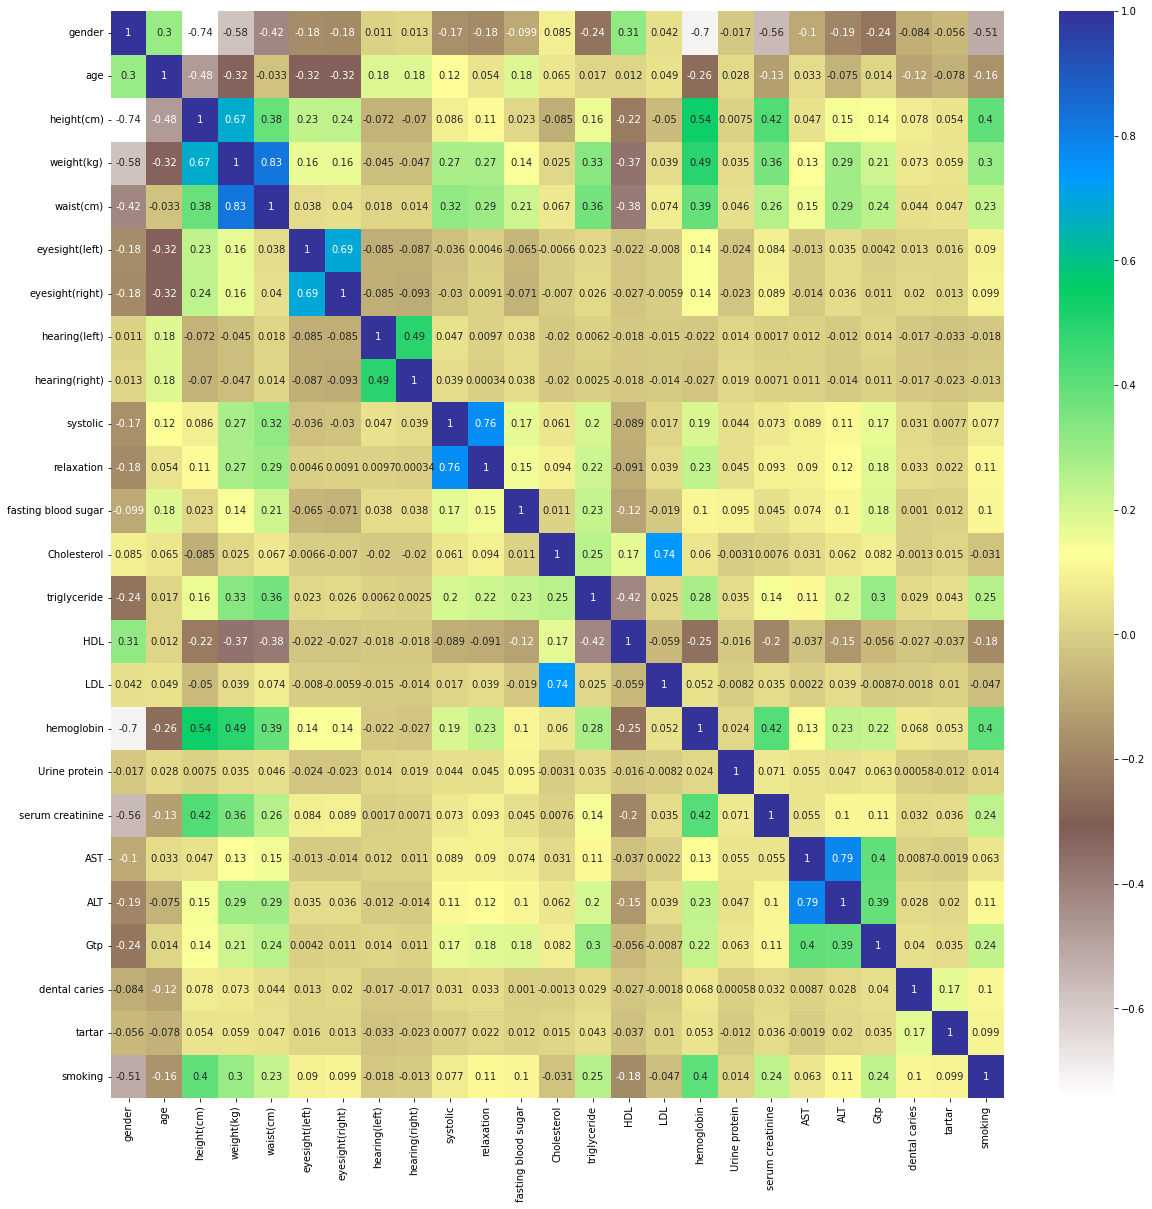

In [424]:
X_correlation = X.corr()
_, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(X_correlation, ax=ax, annot=True, cmap='terrain_r')

Рассмотрим столбцы с корреляцией > 0.5:

In [434]:
corr_cloumns = set()
X_columns = list(X.columns)
for i in range(len(X_correlation)):
    for j in range(i, len(X_correlation)):
        row_column = X_columns[i]
        col_column = X_columns[j]
        cell_corr = X_correlation[row_column][col_column]
        if abs(cell_corr) > 0.4 and cell_corr != 1.0:
            comment = row_column + " AND " + col_column + " has correlation = " + str(cell_corr)
            result = (row_column, col_column, cell_corr, comment)
            if (col_column, row_column, cell_corr, _) not in corr_cloumns:
                corr_cloumns.add(result)

Результаты корреляции

In [435]:
for (_, _, _, comment) in corr_cloumns:
    print(comment)

gender AND weight(kg) has correlation = -0.5764712625051711
gender AND height(cm) has correlation = -0.7441589729017223
gender AND hemoglobin has correlation = -0.7049410363261543
gender AND smoking has correlation = -0.5130985432121685
Cholesterol AND LDL has correlation = 0.7365966120426174
weight(kg) AND waist(cm) has correlation = 0.825927895263033
height(cm) AND hemoglobin has correlation = 0.5402290023121401
height(cm) AND weight(kg) has correlation = 0.6737398804918102
AST AND ALT has correlation = 0.7884848897580591
gender AND serum creatinine has correlation = -0.5552044154917035
weight(kg) AND hemoglobin has correlation = 0.4928666884476079
gender AND waist(cm) has correlation = -0.4214413656805383
triglyceride AND HDL has correlation = -0.42097007447402607
hemoglobin AND smoking has correlation = 0.40205649360131906
hemoglobin AND serum creatinine has correlation = 0.4187205413287657
eyesight(left) AND eyesight(right) has correlation = 0.6868630081529629
hearing(left) AND he

### Поиск новой гипотезы

## Обучение моделей

### Гипертюнинг 

In [427]:
#### Некоторые переменные для гипертюнинга, по идее можно что-то добавить, но это будет)))))))) Хотя почему бы и нет...
splits = [0.2, 0.3, 0.4]
coeffs_svc = [1, 5, 10, 15]
knn_n = [5, 10, 15, 20, 25]
weigths_knn = ['uniform', 'distance']
algo_knn = ['ball_tree', 'kd_tree', 'brute', 'auto']
p_knn = [1, 2]
metric_knn = ['minkowski', 'euclidean']
tree_criteria = ['gini', 'entropy']
split_tree = ['best', 'random']
tree_max_depth = [10, 20, 30, 40, None]
estimator_bagging = [5, 10, 15, 20]
del X['smoking']


In [428]:
#### Тут надо подумать о том какие фичи будут участвовать в обучении моделей................
# del dataset['ID']
# X = dataset
# Y = dataset['smoking']
# del X['smoking']

In [429]:
bagging_results = []
for i in splits:
    for j in estimator_bagging:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i)
        tune_model = BaggingClassifier(n_estimators=j)
        tune_model.fit(X_train, y_train)
        bagging_results.append([i, j, f1_score(y_true = y_test, y_pred=tune_model.predict(X_test)), accuracy_score(y_true = y_test, y_pred=tune_model.predict(X_test))])

KeyboardInterrupt: 

In [ ]:
tree_results = []
for i in splits:
    for j in tree_criteria:
        for k in split_tree:
            for z in tree_max_depth:
                X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i)
                tune_model = DecisionTreeClassifier(criterion=j, splitter=k, max_depth=z)
                tune_model.fit(X_train, y_train)
                tree_results.append([i, j, k, z, f1_score(y_true = y_test, y_pred=tune_model.predict(X_test)), accuracy_score(y_true = y_test, y_pred=tune_model.predict(X_test))])

In [ ]:
knn_results = []
for i in splits:
    for j in knn_n:
        for k in weigths_knn:
            for p in algo_knn:
                for z in p_knn:
                    for m in metric_knn:
                        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i)
                        tune_model = KNeighborsClassifier(n_neighbors=j, weights=k, algorithm=p, p=z, metric=m)
                        tune_model.fit(X_train, y_train)
                        knn_results.append([i, j, k, p, z, m, f1_score(y_true = y_test, y_pred=tune_model.predict(X_test)), accuracy_score(y_true = y_test, y_pred=tune_model.predict(X_test))])
        

KeyboardInterrupt: 

In [ ]:
svc_results = []
for i in splits:
    for j in coeffs_svc:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i)
        tune_model = SVC(C= j)
        tune_model.fit(X_train, y_train)
        svc_results.append([i, j, f1_score(y_true = y_test, y_pred=tune_model.predict(X_test)), accuracy_score(y_true = y_test, y_pred=tune_model.predict(X_test))])
        

In [ ]:
knn_results[-1]

In [ ]:
sorted(svc_results, key=lambda x: x[2], reverse=True)[0]

In [ ]:
sorted(tree_results, key=lambda x: x[4], reverse=True)[0]

In [ ]:
sorted(bagging_results, key=lambda x: x[2], reverse=True)[0]

### Модели

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
svc_model = SVC(C=10)
knn_model = KNeighborsClassifier(n_neighbors=20, weights='distance', algorithm='kd_tree', p=1, metric='minkowski')
tree_model = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=None)
bagging_model = BaggingClassifier(n_estimators=15)
boost_model = AdaBoostClassifier()

## Сбор результатов

### Проверка гипотез

In [ ]:
X = dataset[['eyesight(left)', 'eyesight(right)', 'dental caries', 'tartar']]
y = dataset['smoking']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#Здесь дальше идёт код лучшей модели, на данный момент лучшая Bagging(Adaboost не трогал)
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=None),n_estimators=15)
bagging_model.fit(X_train, y_train)
predicted_X = bagging_model.predict(X_test)
score = f1_score(y_true=y_test, y_pred=predicted_X)
print('F1 measure:',score)

### Сравнение моделей

In [ ]:
##### Здесь сравнение моделей


### Результаты

In [ ]:
##### Сборка результирующих csv-шников с результатами проверки гипотез из лучшей модели


result_df_example.to_csv('hypothesis_name.csv')